<a href="https://colab.research.google.com/github/IqraMuzaffar/CVIP-DataScience/blob/main/Breast_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction**

dataset taken from Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


In [25]:
# importing libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
df=pd.read_csv('/content/breast-cancer.csv')

In [27]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
# return all the columns with null values count
df.isna().sum() #no null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [29]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Clean and prepare Data**

In [30]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [34]:
# Drop the id column..not useful
df.drop('id',axis=1)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

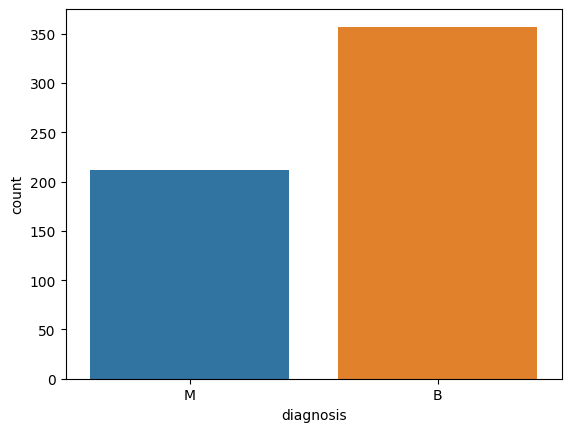

In [37]:
sns.countplot(x='diagnosis', data=df)
plt.ylabel("count")
plt.show()

In [38]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Explore Data**

 sns.pairplot() is used to create the pairplot, with the data coming from columns 1 to 4 of the DataFrame specified by vars=columns_to_include. The hue="diagnosis" argument colors the data points based on the 'diagnosis' column.




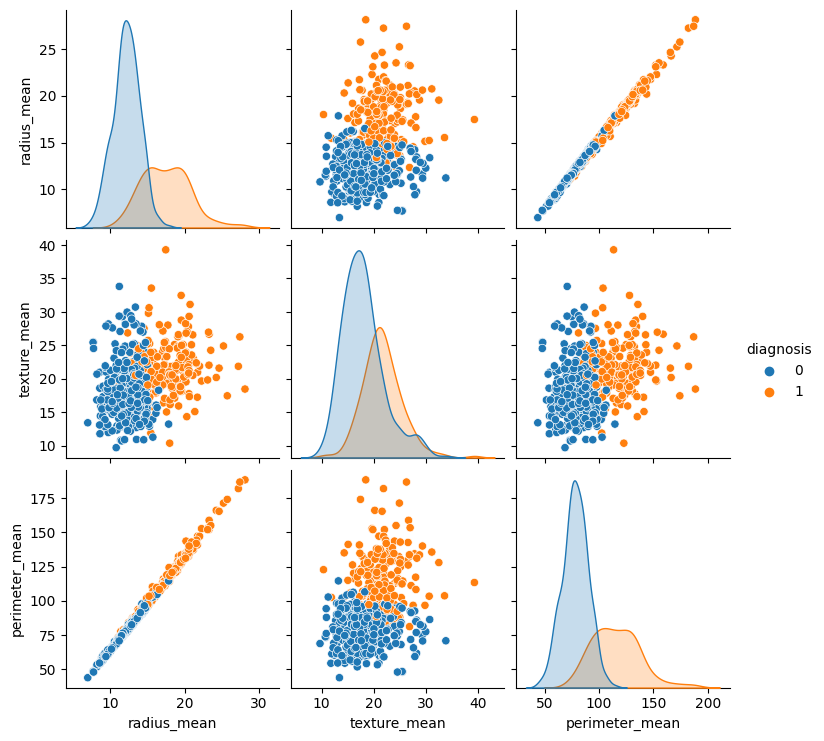

In [39]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")


# **Splitting Data**

In [41]:
# Split the dataset into dependent (X) and independent (Y) datasets
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values

# Print the columns in X and Y
print("Columns in X:")
print(X)

print("\nColumns in Y:")
print(Y)


Columns in X:
[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]

Columns in Y:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# **Feature Scaling**

In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# **Model Classification**

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix


**Logistic Regression**

In [50]:
# Using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, Y_train)
logistic_pred = logistic_classifier.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(Y_test, logistic_pred)
logistic_cm = confusion_matrix(Y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)


Logistic Regression Accuracy: 0.951048951048951
Logistic Regression Confusion Matrix:
[[86  4]
 [ 3 50]]


**KnNeigbours Classifier**

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix



# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, Y_train)
knn_pred = knn_classifier.predict(X_test)

# Evaluate KNeighborsClassifier
knn_accuracy = accuracy_score(Y_test, knn_pred)
knn_cm = confusion_matrix(Y_test, knn_pred)
print("\nKNeighborsClassifier Accuracy:", knn_accuracy)
print("KNeighborsClassifier Confusion Matrix:")
print(knn_cm)


KNeighborsClassifier Accuracy: 0.951048951048951
KNeighborsClassifier Confusion Matrix:
[[89  1]
 [ 6 47]]


**Support Vector Machine(SVC)**

In [52]:


# Using Support Vector Machine (SVC) with a linear kernel
from sklearn.svm import SVC
svc_linear_classifier = SVC(kernel='linear', random_state=0)
svc_linear_classifier.fit(X_train, Y_train)
svc_linear_pred = svc_linear_classifier.predict(X_test)

svc_linear_accuracy = accuracy_score(Y_test, svc_linear_pred)
svc_linear_cm = confusion_matrix(Y_test, svc_linear_pred)
print("\nSupport Vector Machine (Linear Kernel) Accuracy:", svc_linear_accuracy)
print("Support Vector Machine (Linear Kernel) Confusion Matrix:")
print(svc_linear_cm)


Support Vector Machine (Linear Kernel) Accuracy: 0.958041958041958
Support Vector Machine (Linear Kernel) Confusion Matrix:
[[86  4]
 [ 2 51]]


**Naive Bayes**

In [53]:

# Using Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)
naive_bayes_pred = naive_bayes_classifier.predict(X_test)

# Evaluate Naive Bayes
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes_pred)
naive_bayes_cm = confusion_matrix(Y_test, naive_bayes_pred)
print("\nNaive Bayes Accuracy:", naive_bayes_accuracy)
print("Naive Bayes Confusion Matrix:")
print(naive_bayes_cm)



Naive Bayes Accuracy: 0.9440559440559441
Naive Bayes Confusion Matrix:
[[87  3]
 [ 5 48]]


**Decision Tree**

In [54]:



# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_classifier.fit(X_train, Y_train)
decision_tree_pred = decision_tree_classifier.predict(X_test)

# Evaluate Decision Tree
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_pred)
decision_tree_cm = confusion_matrix(Y_test, decision_tree_pred)
print("\nDecision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Confusion Matrix:")
print(decision_tree_cm)



Decision Tree Accuracy: 0.9370629370629371
Decision Tree Confusion Matrix:
[[83  7]
 [ 2 51]]


**Random Forest**

In [55]:


# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
random_forest_classifier.fit(X_train, Y_train)
random_forest_pred = random_forest_classifier.predict(X_test)

# Evaluate Random Forest
random_forest_accuracy = accuracy_score(Y_test, random_forest_pred)
random_forest_cm = confusion_matrix(Y_test, random_forest_pred)
print("\nRandom Forest Accuracy:", random_forest_accuracy)
print("Random Forest Confusion Matrix:")
print(random_forest_cm)



Random Forest Accuracy: 0.965034965034965
Random Forest Confusion Matrix:
[[87  3]
 [ 2 51]]


# **Conclusion**

Random Forest gave the best acuuracy!